<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/ML/18BCE247_ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Urvashi Ramdasani

Roll Number - 18BCE247

Batch - D3

Aim : Linear Regression with Regularization (without using
sklearn or equivalent library) and Simple and Multiple
Linear Regression with and without regularization using
Sklearn

In [1]:
# Load the libraries

import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the Data

X, y = datasets.load_boston(return_X_y = True)
print('Shape of Independent Variables : ', X.shape)
print('Shape of Dependent Variables : ', y.shape)

Shape of Independent Variables :  (506, 13)
Shape of Dependent Variables :  (506,)


In [3]:
# Data Preprocessing

X_train_tmp = X[0:400, :]
X_train = np.ones((X_train_tmp.shape[0], X_train_tmp.shape[1] + 1))
X_test_tmp = X[400:506, :]
y_train = y[0:400]
y_test = y[400:506]
X_train[:, 1:] = X_train_tmp
X_test = np.ones((X_test_tmp.shape[0], X_test_tmp.shape[1] + 1))
X_test[:, 1:] = X_test_tmp

# Scale the model

scalar = StandardScaler()
scalar.fit(X_train[:, 1:])
X_train[:, 1:] = scalar.transform(X_train[:, 1:])
X_test[:, 1:] = scalar.transform(X_test[:, 1:])

In [4]:
# Implement the algorithm

theta = np.random.randn(X_train.shape[1])
theta

array([ 0.36329366, -0.3289416 ,  0.0467768 , -0.26213866,  0.95466226,
       -1.31858491,  0.82182801,  0.61009815,  0.22714846,  2.47403332,
       -2.01641508, -2.18620675,  1.0986749 ,  1.48545247])

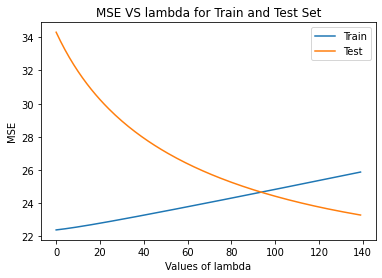

In [5]:
# Normal Equation with Regularisation

matrix = np.zeros((X_train.shape[1], X_train.shape[1]))
for i in range(1, X_train.shape[1]):
  matrix[i, i] = 1

train_mse = []
test_mse = []

for lam in range(10, 150):
  X_tmp = np.linalg.inv(np.dot(X_train.T, X_train) + lam * matrix) # Regularisation
  x = np.dot(X_tmp, X_train.T)
  thetas = np.dot(x, y_train)
  
  y_train_predict = np.dot(X_train, thetas)
  mse_train = metrics.mean_squared_error(y_true = y_train, y_pred = y_train_predict)
  train_mse.append(mse_train)

  predict = np.dot(X_test, thetas)
  mse_test = metrics.mean_squared_error(y_true = y_test, y_pred = predict)
  test_mse.append(mse_test)

plt.plot(train_mse)
plt.plot(test_mse)
plt.title('MSE VS lambda for Train and Test Set')
plt.xlabel('Values of lambda')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'])
plt.show()